# COGS 118A- Project Checkpoint

# Names

- Cain Chen
- Zhigang Lin
- Xue Wang
- Hongxin Song
- Jinghong Luo

# Abstract 
The aim of this project is to predict the popularity of a new track taking features such as artists, danceability and duration etc. by generating a model based on supervised machine learning algorithms. The data we choose to use is a dataset which contains audio and other features of more than 600,000 tracks extracted from spotify ranging from 1921 to 2022. We plan to first standardize features like duration, numbers of followers of the artists and date. Then we would take a close look at the features through EDA to determine further data preprocessing procedure of the dataset. Next step is to create a baseline model using linear regression with dancibility as the sole predictive parameter. In order to generate a high- accuracy model, we would use different supervised algorithms like SVR, random forest regressor and LASSO regression with engineered features and measure their performances using different metrics such as $R^2$ and MSE. We strive for a higher $R^2$ score and a lower MSE. We will also incorporate cross validation for tuning the hyperparameters. At the end, We plan to generate a simple neural network using keras to see whether this gives us higher accuracy. 

# Background

Music has always been an important component of the entertainment industry. The emergence of pop music began with songs and pieces available as digital sound files. People's orientation to music has evolved with time, from country and rock of “the good old days”  to electronic and hip-hop styles that are nowadays popular. A variety of factors can determine the popularity of a track. Rhythm and lyrics are some of the most important features in determining the popularity as well as other features like the producer, energy and release date. Our goal is to predict the popularity<a name="ref_1"></a>[<sup>[1]</sup>](#reference_1) of the track once it is released based on basic features of the track. Other data scientists have tried to use only the audio feature of the song itself to predict its popularity<a name="ref_2"></a>[<sup>[2]</sup>](#reference_2). While they used primarily audio features to train their model, we have decided to tackle the problem from a different perspective, incorporating features such as the producer, the number of followers the artist has and the name of the track. We believe that our model enables us to predict the popularity of the track more effectively, i.e. without the need to listen to the whole track.

# Problem Statement

After looking at the dataset, we find an interesting column called <b>popularity</b>. Based on the description from the source of the data(Kaggle), this column measures how popular the track is in a range of 0 to 100. We intend to understand how the values in the popularity column are obtained. More specifically, given other columns such as energy, danceability and #_followers, can we predict the popularity of the track? Additionally, based on domain knowledge, are there any other interesting features that we can engineer in order to improve our predictions? According to other data scientists, "the genre, track lyrics, day of release, and artist are driving forces for predicting popularity."<a name="ref_3"></a>[<sup>[3]</sup>](#reference_3) Also note that the duration of the track and the number of profane words used are correlated with the popularity<a name="ref_3"></a>[<sup>[3]</sup>](#reference_3). It is clear that we have a regression problem here since the predicted values are continuous. If we take linear regression as an example, this problem can be expressed as  $popularity=w_0+w_1x_1+...+w_dx_d$ where $x_i$'s are features to be determined. Therefore our goal is to fit the best regression model with appropriate features in order to improve our prediction accuracy on popularity. 

# Data

### Dataset Overview<a name="data"></a>[<sup>[4]</sup>](#data_ref)
The dataset consists of two separate sub-datasets which we will combine together in this project.
* The first sub-dataset, which is based on artists' popularity, has a shape of **(1162095, 5)**, meaning we will have **1162095** observations and **5** variables.
* The second sub-dataset, which is on features of tracks, has a shape of **(586672, 20)**, meaning we will have **586672** observations and **20** variables.

### Features of the First sub-dataset
* Id: unique id of artist
* followers: number of followers for that artist
* genres: the genres associated with artist in list
* name: the name of artist
* popularity: the popularity of artist in range 0 to 100

### Features of the Second sub-dataset
* Id: unique id of track from the artist(s)
* name: name of track
* popularity: popularity of track in range 0 and 100
* duration_ms: duration of songs in milisecond
* explicit: whether it contains explicit content or not, using 1 to represent explicit and 0 otherwise.
* artists: artist(s) who created the track
* id_artists: id of artists who created the track
* release_date: date of release for the track
* danceability: how danceable a song is in range 0 to 1
* energy: how energized a song is in range 0 to 1
* key: major note of track
* loudness: how loud a song is in db
* mode: the modality of track, using 1 to represent major and 0 for minor
* speechiness: the presence of spoken words in track in range 0 to 1
* acousticness: how acoustic a track is in range 0 and 1
* instrumentalness: the absence of vocal sounds in track in range 0 to 1
* liveness: the presence of audience in track in range 0 to 1
* valence: the positiveness of the track in range 0 to 1
* tempo: the overall tempo of track in BPM
* time_signature: the time signature of the track in range 0 to 5. 

### Critical Variable Representations
* popularity (in both dataset): represented in floats in the range 0 to 100
* release_date: date of release for the track
* danceability: how danceable a song is in range 0 to 1
* energy: how energized a song is in range 0 to 1
* key: major note of track
* loudness: how loud a song is in db
* mode: the modality of track, using 1 to represent major and 0 for minor
* speechiness: the presence of spoken words in track in range 0 to 1
* acousticness: how acoustic a track is in range 0 and 1
instrumentalness: the absence of vocal sounds in track in range 0 to 1
* liveness: the presence of audience in track in range 0 to 1
* valence: the positiveness of the track in range 0 to 1
* tempo: the overall tempo of track in BPM
* time_signature: the time signature of the track in range 0 to 5

<b>Any special handling, transformations, cleaning etc will be needed:</b><br>
We will make sure to clean up the dataset to remove any unwanted duplicating observations.<br>
We will also make sure to take good care of missing data by implementing appropriate data imputation methods.


## Data Cleaning

In [3]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from sklearn.preprocessing import MinMaxScaler

In [1]:
artists=pd.read_csv('data/artists.csv')
tracks=pd.read_csv('data/tracks.csv')

In [16]:
tracks.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0     0.021994         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1     0.016885         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2     0.031737         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3     0.030895         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4     0.028434         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  ...  acousticness  instrumentalness  \
0   1922-02-22         0.645  0.4450  ...         0.674            0.7440   
1   1922-06-01         0.695  0.2630  ...         0.797            0.0000   
2   1922-03-21         0.434  0.1770  ...         0.994            0.0218   
3   1922-03-21         0.321  0.0946  ...         0.995            0.9180   
4   1922-01-01         0.402  0.1580  ...         0.989            0.1300   

   liveness  valence     tempo  time_signature  release_weekday  release_year  \
0     0.151    0.127  0.425564               3        Wednesday          1922   
1     0.148    0.655  0.414029               1         Thursday          1922   
2     0.212    0.457  0.529335               5          Tuesday          1922   
3     0.104    0.397  0.689907               3          Tuesday          1922   
4     0.311    0.196  0.418945               4           Sunday          1922   

   artists_popularity  artists_follower  
0                   4              91.0  
1                   0               3.0  
2                  23            3528.0  
3                  23            3528.0  
4                  35           11327.0  

[5 rows x 24 columns]

In [17]:
artists.head()

id  followers genres  \
0  0DheY5irMjBUeLybbCUEZ2        0.0     []   
1  0DlhY15l3wsrnlfGio2bjU        5.0     []   
2  0DmRESX2JknGPQyO15yxg7        0.0     []   
3  0DmhnbHjm1qw6NCYPeZNgJ        0.0     []   
4  0Dn11fWM7vHQ3rinvWEl4E        2.0     []   

                                             name  popularity  
0  Armid & Amir Zare Pashai feat. Sara Rouzbehani           0  
1                                     ปูนา ภาวิณี           0  
2                                           Sadaa           0  
3                                       Tra'gruda           0  
4                          Ioannis Panoutsopoulos           0

In [84]:
def clean_text(x):
    """clean the text for aritists name, genres, and id"""
    out=x.replace('[','').\
            replace(']','').\
            replace("'",'').\
            replace(' ','').\
            strip().split(',')
    if(len(out)==1 and out[0]==''):
        return []
    else:
        return out


In [85]:
tracks['artists']=tracks['artists'].apply(clean_text)
tracks['id_artists']=tracks['id_artists'].apply(clean_text)
artists['genres']=artists['genres'].apply(clean_text)

## Feature Engineering

##### Note:
We included two new features which were outputs from the combinations of *id_artists* from **tracks** dataset and *popularity* and *followers* column in **artists** dataset.<br>
The process of running and debugging the below two functions took 2 days, so we instead of presenting the whole process, we decided to use a completed version of the data, which will be uploaded to our group repo as well.

In [6]:
def max_pop(x):
    """
    'artists_popularity' column
    
    input: a list of ids of artists contributed to a single track
    
    output: the maximum of popularity of the artists in the input
    """
    out=[]
    if(len(x)>0):
        for i in x:
            if len(artists[artists['id']==i]['popularity'])>0:
                out.append(artists[artists['id']==i]['popularity'].iloc[0])
    else:
        out.append(0)
    if len(out)!=0:
        return np.max(out)
    else:
        return 0

    
def tot_follower(x):
    """
    'artists_follower' column
    
    input: a list of ids of artists contributed to a single track
    
    output: the sum of followers of the artists in the input
    """
    out=[]
    if(len(x)>0):
        for i in x:
            if len(artists[artists['id']==i]['followers'])>0:
                out.append(artists[artists['id']==i]['followers'].iloc[0])
    else:
        out.append(0)
    if len(out)!=0:
        return np.sum(out)
    else:
        return 0

In [12]:
engineered=pd.read_csv('data/tracks_pop_follower.csv')
tracks['artists_popularity']=engineered['artists_popularity']
tracks['artists_follower']=engineered['artists_follower']

In [13]:
tracks['release_date'] = [pd.Timestamp(x) for x in tracks['release_date']]
tracks['release_weekday'] = [x.day_name() for x in tracks['release_date']]
tracks['release_year'] = [x.year for x in tracks['release_date']]

In [36]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(tracks[['duration_ms','loudness','tempo']])
tracks['duration_ms']=scaled[:,0]
tracks['loudness']=scaled[:,1]
tracks['tempo']=scaled[:,2]
raw=tracks.copy()
raw.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0     0.021994         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1     0.016885         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2     0.031737         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3     0.030895         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4     0.028434         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  ...  acousticness  instrumentalness  \
0   1922-02-22         0.645  0.4450  ...         0.674            0.7440   
1   1922-06-01         0.695  0.2630  ...         0.797            0.0000   
2   1922-03-21         0.434  0.1770  ...         0.994            0.0218   
3   1922-03-21         0.321  0.0946  ...         0.995            0.9180   
4   1922-01-01         0.402  0.1580  ...         0.989            0.1300   

   liveness  valence     tempo  time_signature  release_weekday  release_year  \
0     0.151    0.127  0.425564               3        Wednesday          1922   
1     0.148    0.655  0.414029               1         Thursday          1922   
2     0.212    0.457  0.529335               5          Tuesday          1922   
3     0.104    0.397  0.689907               3          Tuesday          1922   
4     0.311    0.196  0.418945               4           Sunday          1922   

   artists_popularity  artists_follower  
0                   4              91.0  
1                   0               3.0  
2                  23            3528.0  
3                  23            3528.0  
4                  35           11327.0  

[5 rows x 24 columns]

## Missingness Handling

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
raw.isnull().sum()

id                     0
name                  71
popularity             0
duration_ms            0
explicit               0
artists                0
id_artists             0
release_date           0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
release_weekday        0
release_year           0
artists_popularity     0
artists_follower       2
dtype: int64

We found missing values in the *name* and *artists_follower* columns. Based on our knowledege of the dataset, missing names of the tracks should be dropped and missing artists_followers should be imputed as 0.

In [44]:
# drop observations with null track name
raw=raw.dropna(subset=['name'])
# impute observations with null artists_follower with 0
imputer=SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
raw['artists_follower']=imputer.fit_transform(raw[['artists_follower']])[:,0]
raw.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0     0.021994         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1     0.016885         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2     0.031737         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3     0.030895         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4     0.028434         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  ...  acousticness  instrumentalness  \
0   1922-02-22         0.645  0.4450  ...         0.674            0.7440   
1   1922-06-01         0.695  0.2630  ...         0.797            0.0000   
2   1922-03-21         0.434  0.1770  ...         0.994            0.0218   
3   1922-03-21         0.321  0.0946  ...         0.995            0.9180   
4   1922-01-01         0.402  0.1580  ...         0.989            0.1300   

   liveness  valence     tempo  time_signature  release_weekday  release_year  \
0     0.151    0.127  0.425564               3        Wednesday          1922   
1     0.148    0.655  0.414029               1         Thursday          1922   
2     0.212    0.457  0.529335               5          Tuesday          1922   
3     0.104    0.397  0.689907               3          Tuesday          1922   
4     0.311    0.196  0.418945               4           Sunday          1922   

   artists_popularity  artists_follower  
0                   4              91.0  
1                   0               3.0  
2                  23            3528.0  
3                  23            3528.0  
4                  35           11327.0  

[5 rows x 24 columns]

# EDA

As mentioned in the problem statement above, the **genre, track lyrics, day of release, and artist** are proven by other data scientists to be useful for predicting the popularity of the track. So we attempt to plot the release date of the track vs. the popularity of the track. 

![date_pop](edas/date_pop.png)

As shown in the plot, more recently released tracks tend to be more popular. We can also see that the color of the lines are determined by the **Key** column, which represents the major note of the track. We can observe that keys such as 0 and 7 are more popular in general and keys such as 3 and 8 are less popular. From the plot, we can see that people generally prefer more recently released tracks with 0 or 7 as the major key. We can see that the release year of the track has a correlation with the popularity of the track.

Let’s further examine the dataset and plot **Energy vs. Popularity**.

![energy_pop](edas/energy_pop.png)

**Energy** is defined as how energized a track is between 0 and 1. From the plot we can see that people don’t like tracks that are too dampened or too energized. Instead, they prefer somewhere in the middle. We can see that people prefer tracks that are between 65% and 75% energized. It seems like there is a **quadratic** relationship between Energy and Popularity.

We see that there is another column called **Loudness** which means how loud a track is between 0 and 1. Intuitively, we can think of Energy and Loudness as interchangeable, i.e. as energy increases, loudness increases. Additionally, Energy and Loudness are on the same scale, thus let’s try to plot Loudness vs. Popularity. 

![loud_pop](edas/loud_pop.png)

We see that the trend is similar to the previous plot. This shows that people prefer tracks with a loudness between 0.75 and 0.85. Since these two plots look quite similar, it might be an indicator that we might need to perform PCA.

We can find another column which may have similar relationship to Popularity as the previous two. 

![dance_pop](edas/dance_pop.png)

As shown above, we see that the relationship between **danceability** and **popularity** is similar to the previous two. People prefer tracks that are 60% to 70% danceable. 

Intuitively, we would think that the **artist** of the track has an impact on the **popularity** of that track. For example, if I wrote a song versus Drake wrote a song, we would predict that the track that Drake wrote is more popular. Let’s see if that’s the case.

![pop_pop_fo](edas/pop_pop_fo.png)

We see that the x-axis represents the maximum number of **popolarity** among artists that produced the track. The data points are sized by the **total number of followers** among artists that produced the track. As shown in the plot, popularity of the track increases as the maximum number of popularity among artists that produced the track increases. Additionally,  popularity of the track increases as the **total number of followers** among artists that produced the track increases. This confirms our guess that the artist of the track has a positive correlation to the popularity of that track.

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Distribution of Each Columns in the dataset

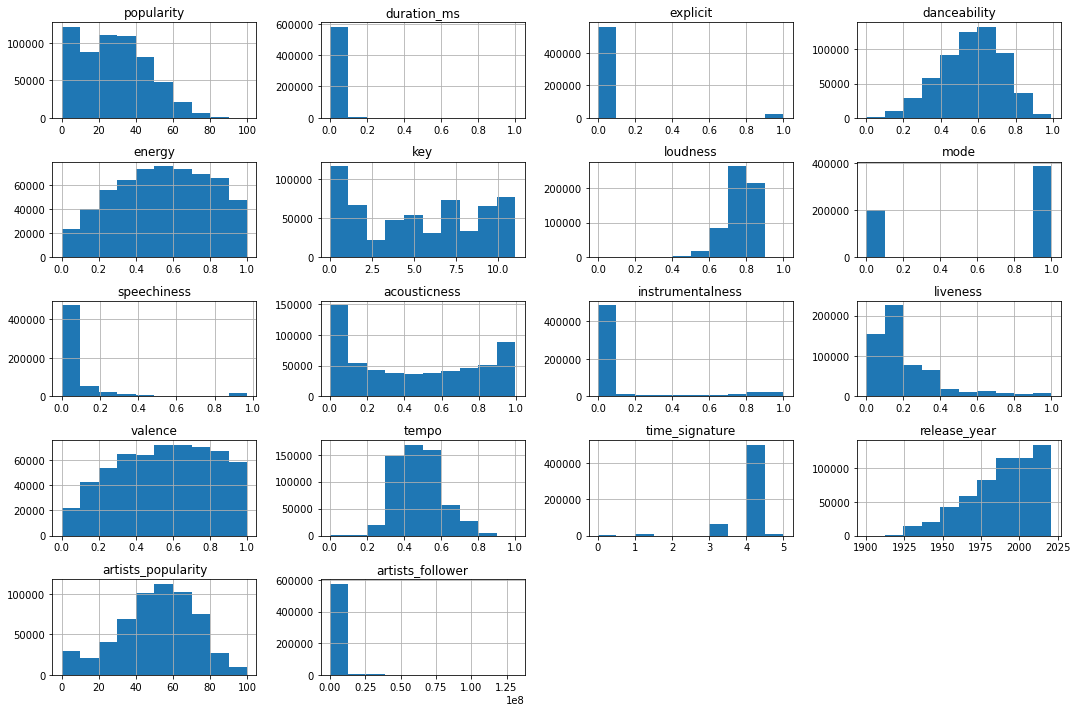

In [70]:
raw.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

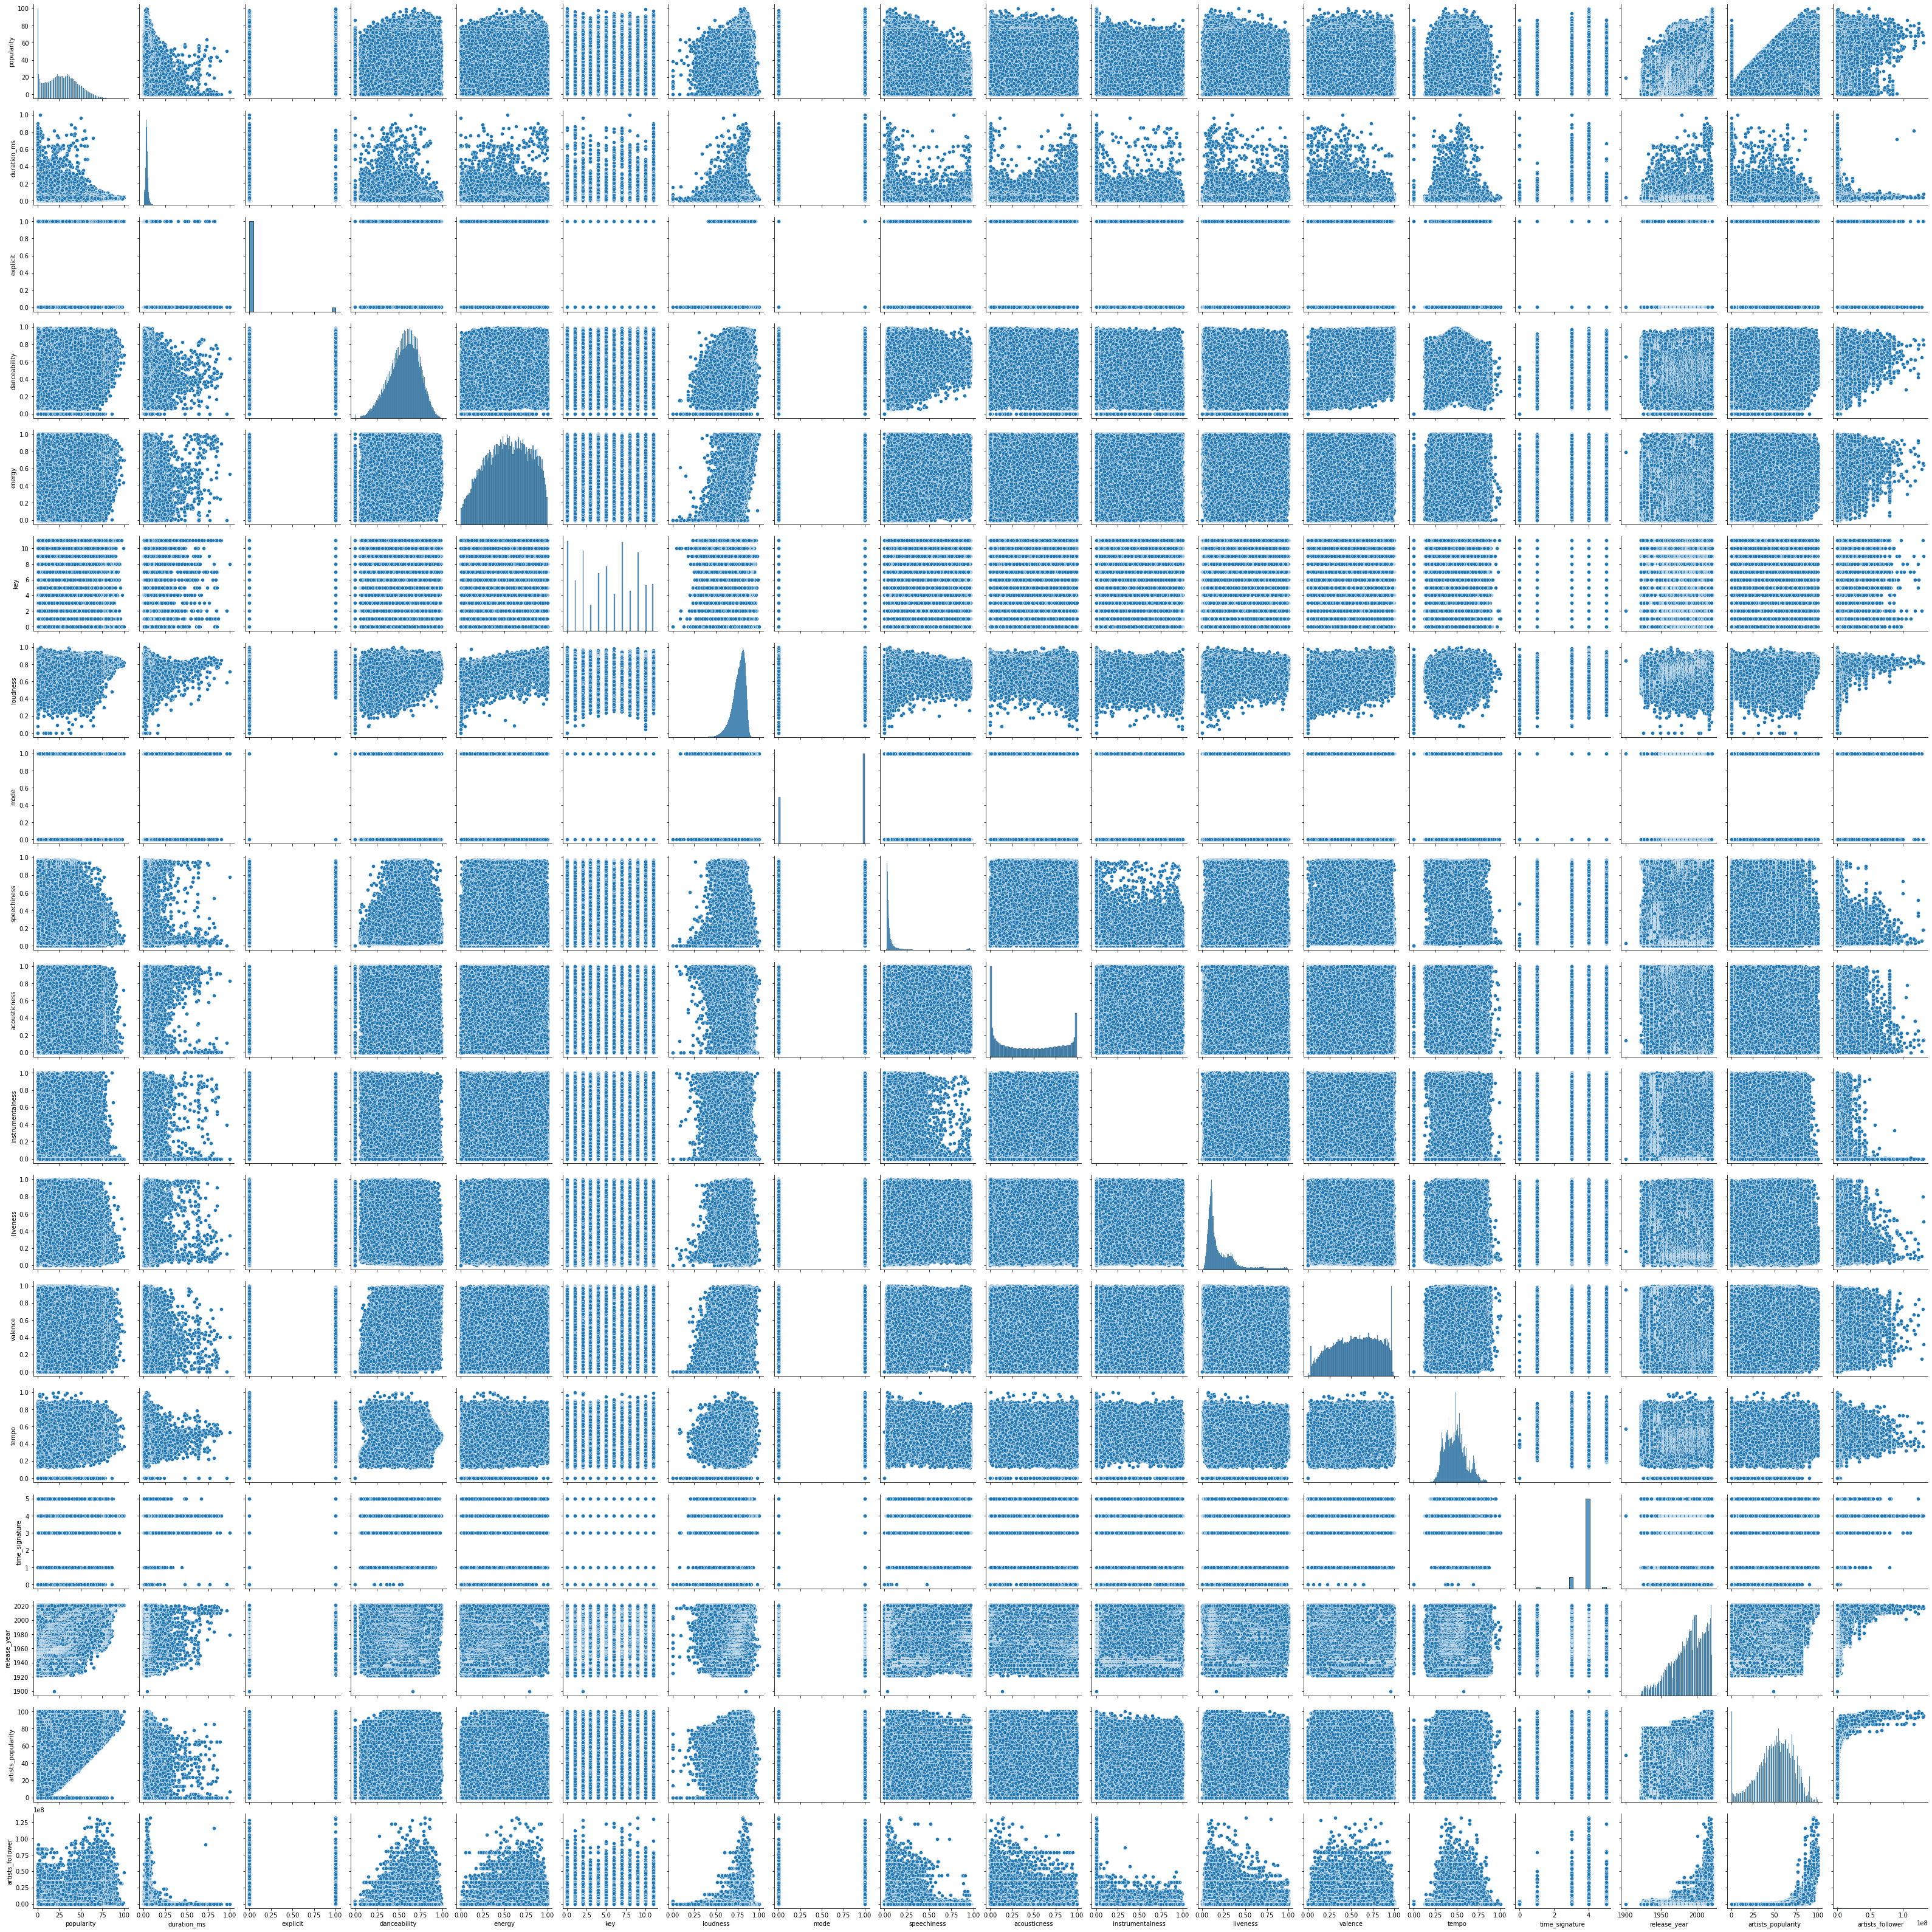

In [72]:
sns.pairplot(raw)

In [74]:
raw

id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586667  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586668  0NuWgxEp51CutD2pJoF4OM                                blind   
586669  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586670  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586671  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6     0.021994         0                          ['Uli']   
1                0     0.016885         0              ['Fernando Pessoa']   
2                0     0.031737         0              ['Ignacio Corsini']   
3                0     0.030895         0              ['Ignacio Corsini']   
4                0     0.028434         0                  ['Dick Haymes']   
...            ...          ...       ...                              ...   
586667          50     0.045377         0                      ['阿YueYue']   
586668          72     0.026691         0                   ['ROLE MODEL']   
586669          70     0.032798         0                      ['FINNEAS']   
586670          58     0.024682         0  ['Gentle Bones', 'Clara Benin']   
586671          38     0.037562         0                    ['Afrosound']   

                                               id_artists release_date  \
0                              ['45tIt06XoI0Iio4LBEVpls']   1922-02-22   
1                              ['14jtPCOoNZwquk5wd9DxrY']   1922-06-01   
2                              ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
3                              ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
4                              ['3BiJGZsyX9sJchTqcSA7Su']   1922-01-01   
...                                                   ...          ...   
586667                         ['1QLBXKM5GCpyQQSVMNZqrZ']   2020-09-26   
586668                         ['1dy5WNgIKQU6ezkpZs4y8z']   2020-10-21   
586669                         ['37M5pPGs6V1fchFJSgCguX']   2020-09-02   
586670  ['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...   2021-03-05   
586671                         ['0i4Qda0k4nf7jnNHmSNpYv']   2015-07-01   

        danceability  energy  ...  acousticness  instrumentalness  liveness  \
0              0.645  0.4450  ...         0.674          0.744000    0.1510   
1              0.695  0.2630  ...         0.797          0.000000    0.1480   
2              0.434  0.1770  ...         0.994          0.021800    0.2120   
3              0.321  0.0946  ...         0.995          0.918000    0.1040   
4              0.402  0.1580  ...         0.989          0.130000    0.3110   
...              ...     ...  ...           ...               ...       ...   
586667         0.560  0.5180  ...         0.785          0.000000    0.0648   
586668         0.765  0.6630  ...         0.141          0.000297    0.0924   
586669         0.535  0.3140  ...         0.895          0.000150    0.0874   
586670         0.696  0.6150  ...         0.206          0.000003    0.3050   
586671         0.686  0.7230  ...         0.105          0.000000    0.2640   

        valence     tempo  time_signature  release_weekday  release_year  \
0        0.1270  0.425564               3        Wednesday          1922   
1        0.6550  0.414029               1         Thursday          1922   
2        0.4570  0.529335               5          Tuesday          1922   
3        0.3970  0.689907               3          Tuesday          1922   
4        0.1960  0.4

# Proposed Solution

We have two datasets for this project, tracks.csv and artists.csv. We see that these datasets can be joined on the column artist_id which serves as the primary key in artists.csv and as the foreign key in tracks.csv. We will first perform a left join on these datasets.

We will use the subset of the dataset where both tracks_name and artist_name only contain English characters. We anticipate that the cardinality will be smaller after this procedure but still satisfies the requirement.

We intend to build a regression model to predict the popularity of a song using pipeline-engineered features from the cleaned and processed data combined from the two datasets mentioned above.


**Baseline Model** $$Popularity=w_{Dancibility}*Dancibility + w_0$$
The intention of the baseline model is to set a basic standard of the performance of the model for further improvement. This means that the performance of our final model cannot be worse than this one.


**Improved Model** $$Popularity=w_1X_1+w_2X_2+...+w_dX_d+w_0$$
The improved Model would contain all of the raw features with statistical significance.


**Final Model** $$Popularity=w_1Z_1+w_2Z_2+...w_{d^{'}}Z_{d^{'}}+w_0^{'}$$ where $Z_i, i={1,2,..,d'}$ are pipeline engineered features from the raw features. 


<b>Possible features:</b>
- Duration of the song (standardized)
- Explicit content (0/1)
- Song name (vectorization)
- Date of release
- Danceability of a song(0-1)
- The extent of Energization(0-1)
- Popularity of the artist(1-100)
- Number of followers of the artist(standardized)
- Interaction terms(e.g. Danceability* Energization)
- ......



# Model Selection

In [127]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [77]:
X=raw.drop(['popularity'],axis=1)
y=raw['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)


In [99]:
def print_scores(scores):
    print()
    print('CV scores: ')
    print('Mean Trianing R2: ',np.mean(scores['train_r2']))
    print('Mean Trianing MSE: ',np.mean(-scores['train_neg_mean_squared_error']))
    print('Mean Testing R2: ',np.mean(scores['test_r2']))
    print('Mean Testing MSE: ',np.mean(-scores['test_neg_mean_squared_error']))
    print()

### Baseline Model

In [104]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
scores=cross_validate(linreg, 
                X_train[['danceability']], 
                y_train, cv=10,
                scoring=['neg_mean_squared_error','r2'],
                verbose=3,
              return_train_score=True)

print_scores(scores)
print('Test Socres:')
print('Test MSE: ',
      np.mean((linreg.fit(X_train[['danceability']],y_train).predict(X_test[['danceability']])-y_test)**2))
print('Test R2:',linreg.score(X_test[['danceability']],y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV]  , neg_mean_squared_error=(train=-326.470, test=-324.419), r2=(train=0.035, test=0.036), total=   0.0s
[CV]  ................................................................
[CV]  , neg_mean_squared_error=(train=-325.868, test=-329.832), r2=(train=0.035, test=0.033), total=   0.0s
[CV]  ................................................................
[CV]  , neg_mean_squared_error=(train=-326.149, test=-327.309), r2=(train=0.035, test=0.034), total=   0.0s
[CV]  ................................................................
[CV]  , neg_mean_squared_error=(train=-326.150, test=-327.292), r2=(train=0.035, test=0.034), total=   0.0s
[CV]  ................................................................
[CV]  , neg_mean_squared_error=(train=-326.589, test=-323.351), r2=(train=0.035, test=0.037), total=   0.0s
[CV]  ................................................................
[CV]  , neg_mean_squared_error=(tr

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


Our baseline model  $Popularity=w_{Dancibility}*Dancibility + w_0$ gives a MSE of *324.6*, and a *R^2* of 0.035, which means there is still spaces for improvement.

### All-inclusive Model

In [108]:
X_train=X_train.select_dtypes(include=np.number)
X_test=X_test.select_dtypes(include=np.number)
linreg = LinearRegression()
scores=cross_validate(linreg, 
                X_train, 
                y_train, cv=10,
                scoring=['neg_mean_squared_error','r2'],
                verbose=3,
              return_train_score=True)

print_scores(scores)
print('Test Socres:')
print('Test MSE: ',
      np.mean((linreg.fit(X_train,y_train).predict(X_test)-y_test)**2))
print('Test R2:',linreg.score(X_test,y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV]  , neg_mean_squared_error=(train=-158.651, test=-157.903), r2=(train=0.531, test=0.531), total=   0.2s
[CV]  ................................................................
[CV]  , neg_mean_squared_error=(train=-158.480, test=-159.436), r2=(train=0.531, test=0.532), total=   0.1s
[CV]  ................................................................
[CV]  , neg_mean_squared_error=(train=-158.662, test=-157.808), r2=(train=0.531, test=0.534), total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  , neg_mean_squared_error=(train=-158.662, test=-157.803), r2=(train=0.531, test=0.534), total=   0.1s
[CV]  ................................................................
[CV]  , neg_mean_squared_error=(train=-158.445, test=-159.757), r2=(train=0.532, test=0.524), total=   0.1s
[CV]  ................................................................
[CV]  , neg_mean_squared_error=(train=-158.629, test=-158.101), r2=(train=0.531, test=0.533), total=   0.1s
[CV]  ................................................................
[CV]  , neg_mean_squared_error=(train=-158.662, test=-157.813), r2=(train=0.530, test=0.535), total=   0.1s
[CV]  ................................................................
[CV]  , neg_mean_squared_error=(train=-158.620, test=-158.185), r2=(train=0.531, test=0.530), total=   0.1s
[CV]  ................................................................
[CV]  , neg_mean_squared_error=(train=-158.572, test=-158.608), r2=(train=0.531, test=0.528), total=   0.

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished


# Evaluation Metrics

intuitive evaluation metric is the **mean squared error(MSE)**,$\frac{1}{n}\sum\limits _{i=1} ^{n}(y_{pred}-y_{actural})^2 $. MSE measures how much our predictions are away from the actual targets, which means that we seek a relatively low value of MSE.



* Since our solutions include a baseline model, we would like to have an evaluation metric for the improvements of performance for different models. We plan to use the **R-squared** metric, i.e. $R^2=1-  \frac{\sum\limits_{i=1}^{n}(y_{pred}-y_{actural})^2}{\sum\limits_{i=1}^{n}(y_{bar}-y_{i})^2}$. $R^2$ measures how much of the variance in y can be explained by x. This way, we will have an idea of how much our model improved by comparing the R2 value of different models .



* In order to tune our hyperparameters and avoid overfitting, we plan to use the classical **k-fold cross validation** strategy. k-fold cross validation allows us to test different hyperparameters on a validation set. By introducing a validation set, we believe that our model will be less susceptible to overfitting.



# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



# Ethics & Privacy

There are no privacy issues during our collection of data. Our datasets used in this project are from the kaggle website and the author collected these data from spotify web Api. Our data contains only generalized statistics about artists and their track’s popularity, genre, etc. None of these values have identifiable information that can be traced back to individual Spotify users. Since the datasets were collected from the official spotify web api with over 600 thousands tracks and more than one million artists, we assumed that potential bias in the data collection is kept to a minimum. 

We stored the dataset in a private github repository that can be only accessed by the instructional team and our team members to ensure that our data is secured. 

During our EDA and data cleaning, we will make sure that we retain most of the original datasets to keep the data bias to a minimum. We will also make visualizations and analysis for the datasets so that we can discover interesting trends and spot any underlying bias within the dataset and address them accordingly. 

Our model utilizes different features of a song such as duration, danceability, etc to evaluate its popularity. We have checked the variables in the datasets and we have not found any data that appeared to be discriminatory. 

One ethical concern that this project may have is that artists may use our model to predict what features are important to the popularity of a song and then focus on satisfying these features when making new songs. This may result in less music produced in less popular genres. We plan to address this issue by setting our project private after the class so that people won’t have access to it.

# Team Expectations 

* We will keep an open line of communication via text messages and email.
* We will have group meetings to discuss the progress of the project.
* We promise to finish our respective parts on time.
* We will respect each other.
* We will reach out to each other for help if needed
* We will be open to constructive criticism without being defensive or negative.

# Project Timeline Proposal

**Important deadlines:**
* Proposal due April 22nd
* Peer review due April 29
* Checkpoint due May 13
* Peer review 2 due May 20
* Final Project June 8


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/19  |  4 PM |  N/A  | Brainstorm topics/questions/dataset (all) | 
| 5/3  |  4 PM |  Project Proposal | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part | 
| 5/10  | 4 PM | Finish data cleaning/processing; Finish feature transformation such as OneHotEncoding, etc. | Review/Edit wrangling/EDA; Discuss Analysis Plan; Discuss possible approach to join the datasets; filter out unnecessary features; Create baseline model; Create plausible data visualizations   |
| 5/17  | 4 PM  | Finish EDA and analysis plan | Discuss/edit project code; Identify most important features; Create more advanced models; Cross validate and model selection; Evaluate our models; Improve our models; Complete project
   |
| 5/23  | 4 PM  | Finish the coding part of the project | Discuss/edit full project; Find any inconsistencies; Correct any errors  |
| 5/30  | 4 PM  |Finish the whole project| Turn in Final Project |

# Footnotes
<a name="reference_1"></a>1.[^](#ref_1): Picard, Madeleine Visualized: Can we Quantify the Most Popular Music? *DISPLAYR Blog*. https://www.displayr.com/most-popular-music/<br> 

<a name="reference_2"></a>2.[^](#ref_2): Peker, Philip (25 Jun 2021) Predicting Popularity on Spotify — When Data Needs Culture More than Culture Needs Data. *Towards Data Science*. https://towardsdatascience.com/predicting-popularity-on-spotify-when-data-needs-culture-more-than-culture-needs-data-2ed3661f75f1<br> 

<a name="reference_3"></a>3.[^](#ref_3): Larkin, Taylor (October 24, 2018). Understanding Song Popularity with Automated Machine Learning. *DataRobot* https://www.datarobot.com/blog/understanding-song-popularity-with-automated-machine-learning/ <br>

<a name="data_ref"></a>4.[^](#data): Kaggle https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks<br>